# Выбор локации для скважины

Добывающей компании нужно решить, где бурить новую нефтяную скважину.

Нам предоставлены пробы нефти из трёх регионов: в каждом 10 000 месторождений, где измерено качество нефти и объёмы запасов. Задача - построить модель машинного обучения, которая поможет определить регион, где добыча наиболее выгодна. Проанализировать возможную прибыль и риски следует с помощью техники *Bootstrap.*

<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Предварительный-вывод" data-toc-modified-id="Предварительный-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительный вывод</a></span></li><li><span><a href="#Распределения-и-корреляции" data-toc-modified-id="Распределения-и-корреляции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Распределения и корреляции</a></span><ul class="toc-item"><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Регион 2</a></span></li><li><span><a href="#Регион-3" data-toc-modified-id="Регион-3-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Регион 3</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-ненужных-столбцов" data-toc-modified-id="Удаление-ненужных-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление ненужных столбцов</a></span></li><li><span><a href="#Разбиение-на-выборки-и-подготовка-модели" data-toc-modified-id="Разбиение-на-выборки-и-подготовка-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разбиение на выборки и подготовка модели</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Рекомендации-по-заполнению-данных" data-toc-modified-id="Рекомендации-по-заполнению-данных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Рекомендации по заполнению данных</a></span></li></ul></li></ul></div>

## Обзор данных

In [1]:
# Импортируем необходимые модули:
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

Для удобства составим небольшую структуру из наших датасетов:

In [3]:
dfs = {'Регион 1': df0, 'Регион 2': df1, 'Регион 3': df2}

Взглянем на общую информацию: технические данные о таблице, первые строки, разбросы значений, поверим на явные пропуски и дубликаты:

In [4]:
for name, df in dfs.items():
    print(f'{name}:')
    print('---------')
    display(df.info())
    display(df.head())
    display(df.describe().T)
    print(f'Пропущенных значений: {df.isna().sum().sum()}')
    print(f'Дубликатов: {df.duplicated().sum()}')
    print()

Регион 1:
---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


Пропущенных значений: 0
Дубликатов: 0

Регион 2:
---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


Пропущенных значений: 0
Дубликатов: 0

Регион 3:
---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Пропущенных значений: 0
Дубликатов: 0



### Предварительный вывод

Все три таблицы однотипные, предоставлены данные по 5 признакам, в том числе одному категориальному (`id`) и четырем вещественным числовым. В их числе объем запасов (`product`) и три признака `f0`, `f1` и `f2`, смысл которых не разглашается. Явных пропусков и дубликатов не обнаружено.

`id`, по-видимому, генерируется случайным образом: дублированные значения встречаются, но мы не можем точно сказать, принадлежат ли они одному и тому же объекту (возможно, это группа объектов или координаты, возможно, данные за разное время, а возможно, просто коллизия хешей).

In [5]:
df0[df0['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


В контексте обучения линейной модели выглядит разумным сохранить все имеющиеся наблюдения, а столбец `id` отбросить как не содержащий полезных для обучения данных.

### Распределения и корреляции

Сделаем беглый обзор матриц рассеивания, разбросов и корреляций признаков:

#### Регион 1

In [6]:
def visualize_features(df):
    df_n = df._get_numeric_data()
    fig, axes = plt.subplots(1, 4, figsize=(16,4))
    for column, ax in zip (df_n.columns, axes.flat):
        sns.violinplot(data=df_n[column], ax=ax, orient='h').set(xlabel=column)
    fig.suptitle('Признаки: плотность и размах')

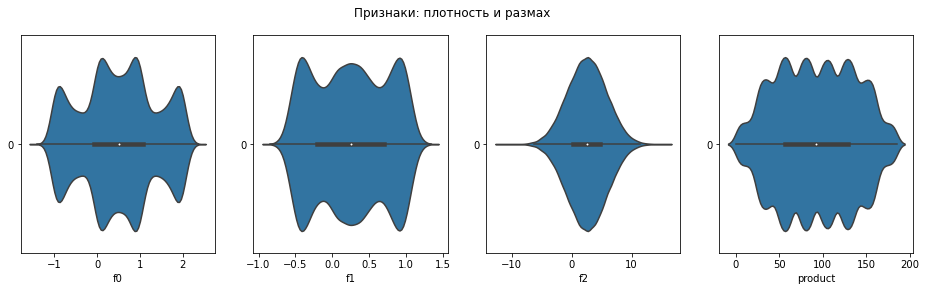

In [7]:
visualize_features(df0)

Распределения `f0` и `f1`, равно как и целевого признака `product`, довольно симметричны (вероятно, данные предварительно шкалированы), но демонстрируют явную мультимодальность. `f2` в первом регионе распределен почти нормально.

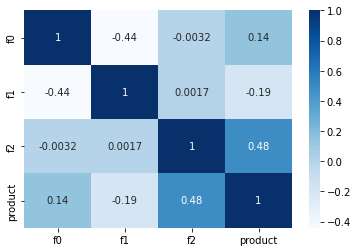

In [8]:
sns.heatmap (df0.corr(), cmap='Blues', annot=True);

Однозначно высоко влияние `f2` на целевой признак - коэффициент Пирсона 0,48, зависимость достаточно линейна, хоть и с широким разбросом. Также прослеживается заметная обратная корреляция `f0` и `f1` (-0,44), и соответствующее слабое влияние на оценку запасов: коэффициенты 0,14 для `f0` и -0,19 для `f1`. Матрица рассеивания, впрочем, демонстрирует, что взамозависимость `f1` и `f2` явно нелинейная:

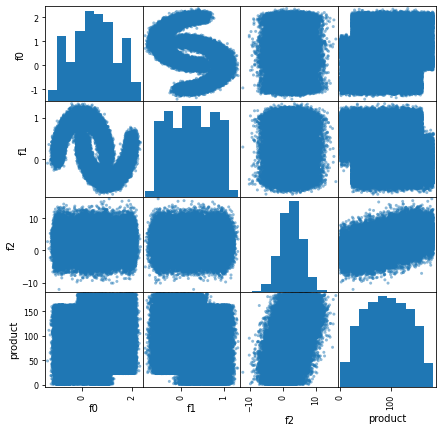

In [9]:
pd.plotting.scatter_matrix(df0, figsize=(7,7));

#### Регион 2

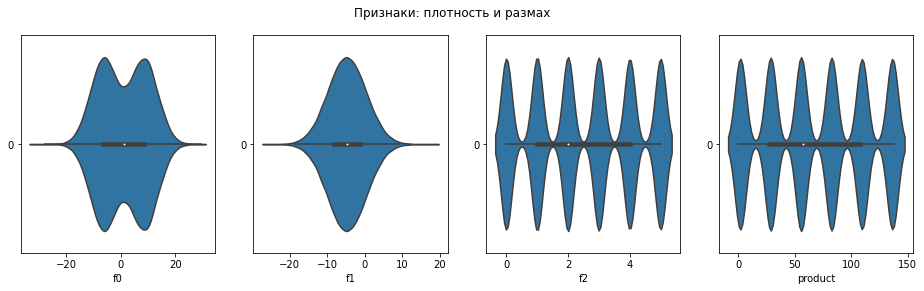

In [10]:
visualize_features(df1)

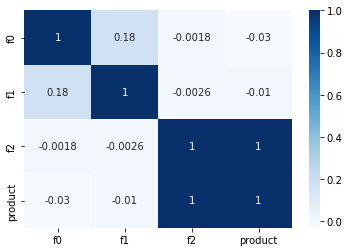

In [11]:
sns.heatmap (df1.corr(), cmap='Blues', annot=True);

Во втором же регионе картина обратная: `f0` и `f1` связаны слабоположительно, а на целевой признак почти не влияют. `f1` распределен почти нормально, а `f0` - с двумя четкими пиками. Зато значения `f2` собраны в несколько компактных групп с очень четкой корреляцией к целевому принаку - коэффициент 1! **Регрессия по этим данным будет очень точной.**

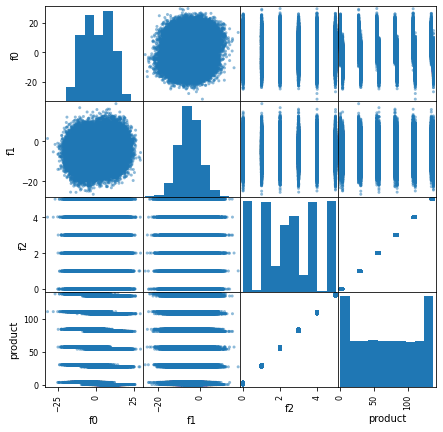

In [12]:
pd.plotting.scatter_matrix(df1, figsize=(7,7));

#### Регион 3

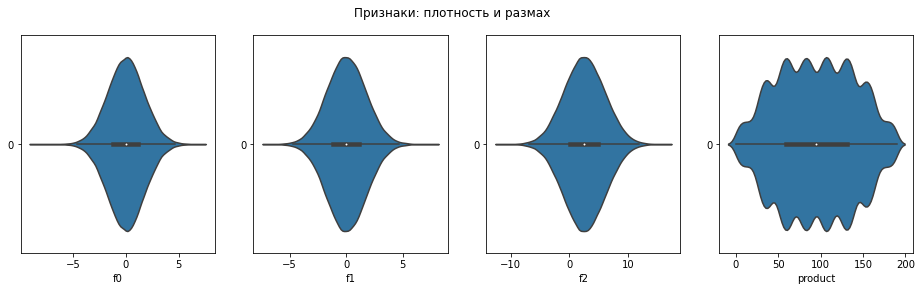

In [13]:
visualize_features(df2)

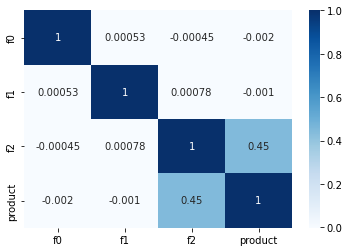

In [14]:
sns.heatmap (df2.corr(), cmap='Blues', annot=True);

Здесь распределения всех трех рабочих признаков околонормальные, а целевой, как и в первом регионе, умеренно мультимодален. Прямая корелляция прослеживается однако лишь между `product` и `f2` - коэффициент 0,45. Мы видим характерные для удаленных выбросов сужения разброса на графиках для `f0` и `f1`:

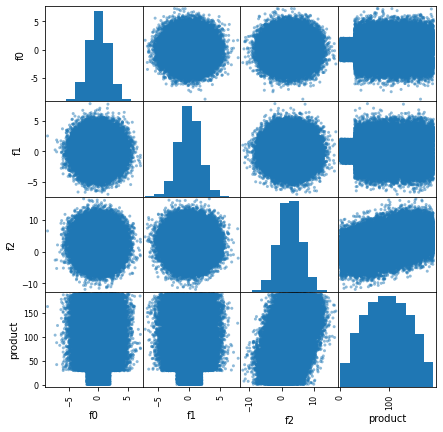

In [15]:
pd.plotting.scatter_matrix(df2, figsize=(7,7));

### Вывод

Распределения и зависимости признаков во всех регионах разные, возможно, что в разных регионах под `f0`-`f2` закодированы и вовсе разные признаки. Каждый регион, как и ожидалось, потребует отдельной модели.

В распределениях сильно выражена мультимодальность, особенно необычно смотрится второй регион с почти равномерным разделением на несколько четких пиков равной величины и четкой корреляцией запасов с признаком `f2`. Не исключено, что это искусственная контрольная группа.

Данные выглядят предобработанными: оценки плотности весьма симметричны, существенные выбросы отсутсвуют.

## Подготовка данных

### Удаление ненужных столбцов

Данные оказались подозрительно качественными, так что просто избавимся от нечислового признака:

In [16]:
def extract_numeric (df):
    return df._get_numeric_data()

In [17]:
def preprocess(df):
    result = (df
              .pipe(extract_numeric)
             )
    return result

In [18]:
for name, df in dfs.items():
    dfs[name] = preprocess(df) 
    display(dfs[name].head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


### Разбиение на выборки и подготовка модели

In [19]:
# Зафиксируем состояние генератора случайных чисел для воспроизведения результатов:
random_state = 177013

In [21]:
class RegionalSurvey:
    '''Чтобы не плодить слишком много кода, соберем данные и методы в рамках региона в класс.
    Каждый регион получит свой экземпляр класса.'''
    def __init__(self, region, df):
        '''Инициализация: подаем на вход датасет и имя, создаем обучающий и валидационный набор,
        а также модель линейной регрессии. Масштабируем признаки.'''
        X = df.drop(['product'], axis=1)
        y = df['product']
        self.name = region
        features_train, features_valid, self.target_train, self.target_valid = train_test_split(X, y, test_size=0.25, random_state=random_state)
        self.scaler =  StandardScaler()
        self.scaler.fit (features_train)
        self.features_train = self.scaler.transform (features_train)
        self.features_valid = self.scaler.transform (features_valid)
        params = {
                    'fit_intercept':[True, False],
                    'copy_X':[True, False]
                 }
        self.model = GridSearchCV(estimator=LinearRegression(), param_grid=params, cv=5, scoring='r2')
        self.pred_cache = pd.Series()
    def train(self):
        '''Обучение: фитим в модель обучающую выборку. Опционально возвращаем обученную модель.
        В большинстве случаев эот метод не нужно вызывать напрямую.'''
        self.model.fit(self.features_train, self.target_train)
        return self.model
    
    def predictions(self, refresh=False):
        '''Предсказание: возвращем значения, предсказанные на базе валидационной выборки, в формате Series.
        Если модель еще не обучена, запускаем обучение, в противном случае только предсказываем.
        Ответы кешируются.'''
        if refresh or self.pred_cache.empty:
            if not hasattr(self.model, 'best_estimator_'):
                self.train()
            self.pred_cache = pd.Series(self.model.predict(self.features_valid))
        return self.pred_cache
    
    def true_values(self):
        '''Валидация: возвращаем значения целевого признака валидационной выборки.
        Обеспечиваем совместимость индексации с predictions()'''
        return self.target_valid.reset_index(drop=True)
    
    def metrics(self):
        '''Валидация: возвращает значения метрик.'''
        mse = mean_squared_error(self.true_values(), self.predictions())
        rmse = mse ** 0.5
        r2 = r2_score(self.true_values(), self.predictions())
        return mse, rmse, r2
    
    def revenue(self):
        '''Это forward-декларация, функция revenue() будет объявлена ниже.'''
        return revenue(self.true_values(), self.predictions())

Условия техзадания требуют от нас только две выборки: учебную и валидационную, но все же воспользуемся оптимизацией с помощью GridSearch на учебной выборке.

In [22]:
#Создадим по экземпляру класса `RegionalSurvey` для каждого региона и составим из них список `regional_data`.
regional_data = []
for name, df in dfs.items():
    region = RegionalSurvey(name, df)
    regional_data.append (region)

## Обучение и проверка модели

In [23]:
# Запросим метрику и предсказания у наших классов - обучение будет вызвано автоматически:
for region in regional_data:
    _, rmse, r2 = region.metrics()
    print (f'{region.name}: средний запас предсказанного сырья {region.predictions().mean():.2f} тыс барр., RMSE {rmse:.2f}, R2 {r2:.2f}')

Регион 1: средний запас предсказанного сырья 92.36 тыс барр., RMSE 37.65, R2 0.27
Регион 2: средний запас предсказанного сырья 69.00 тыс барр., RMSE 0.89, R2 1.00
Регион 3: средний запас предсказанного сырья 94.75 тыс барр., RMSE 40.04, R2 0.20


### Вывод

Как мы и ожидали исходя из аналитического этапа, ошибка на втором регионе очень невелика - менее 1 тыс. барр. С первым и третьим похуже, средняя ошибка в оценке порядка 40 тыс. барр. По сравнению со средним значением - так себе (метрика R2 в этих регионах составляет всего порядка 0,2-0,3), но поскольку нас интересуют в первую очередь самые богатые месторождения (в первом и третьем регионах IV квартиль, как мы помним, приходится на значения 130-190 тыс. барр), а условия техзадания ограничивают нас моделью линейной регрессии, результат можно считать удовлетворительным.

## Подготовка к расчёту прибыли

Будет уместно еще раз вспомнить условия техзадания:

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе - 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

Зафиксируем наши константы:

In [24]:
max_bores = 500
num_bores = 200

regional_funds = 10_000_000_000
revenue_per_point = 450_000

Рассчитаем объём сырья для безубыточной разработки новой скважины. Усредним бюджет в расчете на 200 скважин и найдем точку безубыточности, где доход с объема покрывает эти расходы:

In [25]:
bore_funds = regional_funds / num_bores
total_required_product = regional_funds / revenue_per_point
avg_required_product = total_required_product / num_bores
print(f'Бюджет скважины: {bore_funds/1_000_000:.0f} млн р, уровень безубыточности: {avg_required_product:.1f} тыс барр. (При разработке {num_bores} скважин.)')

Бюджет скважины: 50 млн р, уровень безубыточности: 111.1 тыс барр. (При разработке 200 скважин.)


То есть для самоокупаемости средний запас на скажину должен быть чуть более 111 тыс. баррелей. Как это согласуется с нашей статистикой?

Регион 1: средний запас в расчете на скважину 92.8 тыс. барр.
Регион 2: средний запас в расчете на скважину 69.0 тыс. барр.
Регион 3: средний запас в расчете на скважину 94.3 тыс. барр.


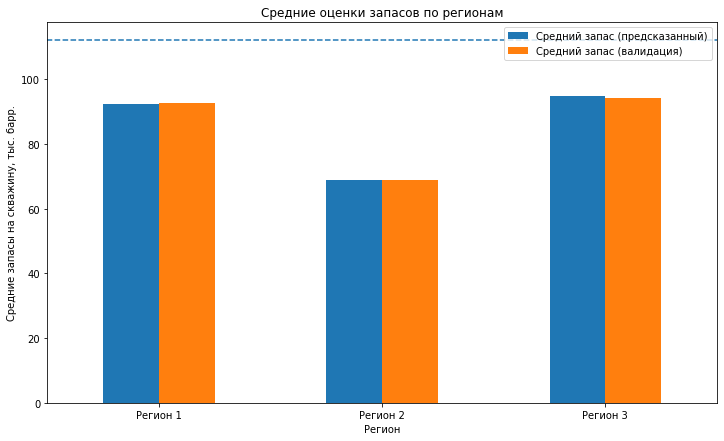

In [26]:
region_preview = pd.DataFrame({'Регион':[], 'Средний запас (предсказанный)':[], 'Средний запас (валидация)':[]})

for region in regional_data:
    print (f'{region.name}: средний запас в расчете на скважину {region.target_valid.mean():.1f} тыс. барр.')
    row = pd.Series ([region.name, region.predictions().mean(), region.target_valid.mean()], index=['Регион', 'Средний запас (предсказанный)', 'Средний запас (валидация)'])
    region_preview = region_preview.append(row, ignore_index=True)
    
ax = region_preview.plot(kind='bar', figsize=(12,7), rot=0)
ax.hlines(y=112, xmin=-1, xmax=3, linestyles='--', label='Multiple Lines')
ax.set(title='Средние оценки запасов по регионам', xlabel='Регион', ylabel='Средние запасы на скважину, тыс. барр.', xticklabels=dfs.keys());

Какой регион ни возьми, уровень безубыточности превышает среднее значение, будь то предсказаное машиной или реальное. В первом и третьем регионах средняя скважина как минимум на 15% беднее, чем нужно, во втором разница еще выше - почти 40%!

### Вывод

Текущий уровень запасов таков, что бессистемная разработка сважин наверняка не окупит затрат: средний запас существенно ниже точки самоокупаемости - 111.1 тыс. баррелей на скважину.

## Расчёт прибыли и рисков 

In [27]:
# Функция расчета прибыли
def revenue(target, predictions):
    # Выбираем топовые предсказания
    top_predictions = predictions.sort_values(ascending=False)
    # Суммируем соответствующие реальные значения, считаем выручку и вычитаем бюджетные расходы:
    top_targets = target[top_predictions.index][:num_bores]
    result = top_targets.sum() * revenue_per_point - regional_funds
    return result

Протестируем нашу функцию: оценим реальную прибыль для 200 скважин валидационной выборки, которые наши модели полагают самыми богатыми:

In [28]:
for region in regional_data:
    print (f'{region.name}: прибыль {region.revenue()/1_000_000:.1f} млн р.')

Регион 1: прибыль 3479.0 млн р.
Регион 2: прибыль 2415.1 млн р.
Регион 3: прибыль 2519.4 млн р.


Используем метод Bootstrap для симуляции 1000 различных вариантов выбора 500 изначальных точек и оценим прибыли и риски после работы нашей модели:

In [31]:
# Симуляция прибыли
def bootstrap(target, predictions):
    revenues = []
    state = pd.np.random.RandomState(random_state)
    
    for i in range(1000):
        target_subsample = target.sample (n=max_bores, random_state=state, replace=True)
        predictions_subsample = predictions[target_subsample.index]
        revenues.append(revenue(target_subsample, predictions_subsample))
    
    revenues = pd.Series(revenues)
    
    lower = revenues.quantile(0.025) / 1_000_000
    higher = revenues.quantile(0.975) / 1_000_000
    t_interval = st.t.interval(0.95, len(revenues)-1, loc=revenues.mean(), scale=revenues.sem())
    interval_edges = [x/1_000_000 for x in t_interval]
    risk = (revenues < 0).mean()
    
    print(f'Средняя прибыль: {revenues.mean() / 1_000_000:.1f} млн р.')
    print(f'Доверительный интервал среднего: {interval_edges[0]:.1f}-{interval_edges[1]:.1f} млн р.')
    print(f'2,5%-квантиль: {lower:.1f} млн р.')
    print(f'97,5%-квантиль: {higher:.1f} млн р.')
    print(f'Риск: {risk:.2%}')
    sns.violinplot(data=revenues, orient='h', title='Распределение доходности', xlabel='Прибыль, р.').set(title='Распределение прибыли', xlabel='Прибыль, р');
    plt.show()

Регион 1:
Средняя прибыль: 461.6 млн р.
Доверительный интервал среднего: 444.9-478.3 млн р.
2,5%-квантиль: -77.7 млн р.
97,5%-квантиль: 987.4 млн р.
Риск: 4.30%


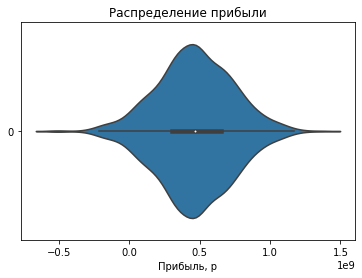

Регион 2:
Средняя прибыль: 535.6 млн р.
Доверительный интервал среднего: 522.2-549.1 млн р.
2,5%-квантиль: 115.9 млн р.
97,5%-квантиль: 951.5 млн р.
Риск: 0.40%


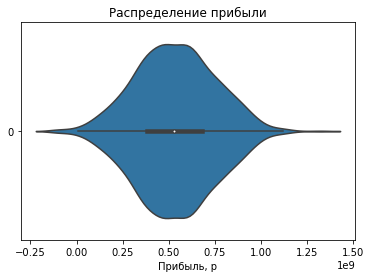

Регион 3:
Средняя прибыль: 330.3 млн р.
Доверительный интервал среднего: 312.4-348.1 млн р.
2,5%-квантиль: -253.1 млн р.
97,5%-квантиль: 880.6 млн р.
Риск: 13.10%


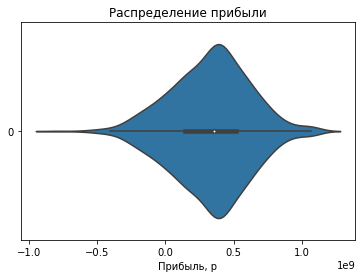

In [32]:
for region in regional_data:
    print(f'{region.name}:')
    bootstrap(region.true_values(), region.predictions())

Что мы видим? Первый регион демонстрирует неплохой потенциал прибыли - в среднем порядка 461 млн р, при этом шанс остаться в убытке лишь 4,3%. 95% значений лежат в диапазоне от убытка в 78 млн р до прибыли почти в 1 млрд.

Второй регион, не в последнюю очередь за счет хорошей точности предсказания, наименее рискованный (всего 0,4% риска остаться в минусе). Средняя прогнозируемая прибыль также выше - порядка 535 млн р. 95% значений строго положительны.

Третий регион показывает наихудший результат - средняя прибыль лишь 330 млн, а медианная еще меньше - доля убыточных вариантов сравнительно высока, больше 13%. Разброс доверительного интервала довольно велик: от убытка свыше 250 млн до прибыли в 880 млн.

### Вывод

Картина рисуется недвусмысленная: второй регион (`geo_data1`) однозначно лидирует по средней выручке (535 млн) и сравним с первым по максимальной, при этом риски минимальные, а модель очень точна. Следом идет первый регион со средним потенциалом прибыли в 461 млн и рисками менее 5%. Третий регион отстает по всем параметрам и едва ли может быть рекомендован при наличии таких альтернатив.

## Общий вывод

Мы проанализировали данные, построили модели предсказания запасов сырья по регионам и смоделировали процесс выбора перспективных скважин и расчета прибыли по ним. Мы можем сделать следующие выводы:

Распределения и зависимости признаков во всех регионах разные, нередко с различной мультимодальностью, возможно, что в разных регионах под `f0`-`f2` закодированы вовсе разные признаки. Использование разных моделей для каждого региона выглядит обоснованным. Аномально выглядит второй регион с почти равномерным разделением запасов на несколько четких пиков равной величины и четкой корреляцией с признаком `f2`.

Как следствие, точность предсказаний линейной регрессии на втором регионе очень высока - RMSE составляет менее 1 тыс. барр. В первом и третьем средняя ошибка выше, порядка 40 тыс. барр., метрика R2 порядка 0,2-0,3 против почти идеальной во втором регионе. Средние значения предсказанного запаса на скважину по регионам составили 92.36 тыс. барр., 69.00 тыс. барр. и 94.75 тыс. барр. соответственно, что согласуется с реальными средними значениями (расхождение менее 1%). Это означает, что текущий средний уровень существенно ниже точки самоокупаемости, рассчитанной из условий техзадания - в среднем 111.1 тыс. баррелей на скважину. Иными словами, бессистемный выбор скважин для разработки однозначно не окупит затрат.

Анализ возможной прибыли методом Bootstrap выявил, что второй регион (`geo_data1`) лидирует и по средней возможной выручке (535 млн р.), и по минимизации рисков (вероятность убытков менее 0,5%). Следом идет первый регион со средним потенциалом прибыли в 461 млн и рисками менее 5%. Третий регион отстает по всем параметрам (330 млн р. при уровне риска выше 13%).

Исходя из этого, второй регион видится наиболее перспективным для разработки (если, конечно, он не введен как искусственная контрольная группа - некоторые особенности распределения данных поволяют предполагать это, - в таком случае следует предпочесть первый регион). Только второй регион соответствует требованию техзадания об уровне риска ниже 2,5%.

### Рекомендации по заполнению данных

Данные качественные, полностью готовые к использованию. Некоторые вопросы вызывают лишь повторные значения `id` скажин, но эти несколько строк не оказывают сколько-нибудь существенного влияния на качество моделей.

Аномалии распределения, очевидно, вызваны предобработкой и, по-видимому, причины их появления разглашаться не будут, как и практический смысл признаков.